# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Daffa Saptrian]
- **Email:** [mc452d5y2470@student.devacademy.id]
- **ID Dicoding:** [dafsap29]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda sepanjang tahun 2011?
- Bagaimana pola pengaruh cuaca terhadap jumlah pengguna sepeda di tahun 2011?
- Apakah ada perbedaan pola penggunaan sepeda pada hari kerja dan akhir pekan di 2011? Jika iya bagaimana polanya?

## Import Semua Packages/Library yang Digunakan

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [89]:
day_df = pd.read_csv("/content/day.csv")
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_2011_df = day_df[day_df["dteday"].dt.year == 2011]
day_2011_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Melakukan filter Data Penggunaan Sepeda pada dataset "day.csv" difilter dalam periode 2011


In [90]:
hr_df = pd.read_csv("/content/hour.csv")
hr_df["dteday"] = pd.to_datetime(hr_df["dteday"])
hr_2011_df = hr_df[hr_df["dteday"].dt.year == 2011]
hr_2011_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Melakukan filter Data Penggunaan Sepeda pada dataset "hour.csv" dalam periode 2011

### Assessing Data


*   Mengecek Tipe Data
*   Mengecek Missing Value

*   Mengecek Duplicate Data
*   Mengecek Outlier

In [91]:
#Tipe Data dan Jumlah Data pada dataset "day.csv"
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [92]:
#Tipe Data dan Jumlah Data pada dataset "hour.csv"
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data dan jumlah data pada dataset "day.csv" sudah sesuai
- Tipe data dan jumlah data pada dataset "hour.csv" sudah sesuai

In [93]:
#Missing Value pada dataset "day.csv"
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [94]:
#Missing Value pada dataset "hour.csv"
hr_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tidak ada missing value pada dataset "day.csv"
- Tidak ada missing value pada dataset "hour.csv"

In [95]:
#Memeriksa Duplikasi Data
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
print("Jumlah Duplikasi: ", hr_df.duplicated().sum())

Jumlah Duplikasi:  0
Jumlah Duplikasi:  0


**Insight:**

Tidak ada data duplikat pada dataset "day.csv" dan "hour.csv" yang berarti tidak ada data yang memiliki value sama dengan data yang lainnya

In [96]:
#Parameter Statistik
day_df.describe(include="all")
hr_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Cleaning Data

Pada proses cleaning data ini akan mengubah tipe data pada kolom tahun (yr), bulan (mnth), hari (weekday & weekend), cuaca (weathershit), dan musim (weathershit) menjadi kategorikal agar memudahkan ketika proses visualisasi data

In [97]:
# Mengubah Tipe Data
day_df['yr'] = day_df['yr'].map({0: '2011', 1:'2012'})
day_df['mnth'] = day_df['mnth'].map({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'})
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], ordered=True)
day_df['season'] = day_df['season'].map({
    1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Cuaca Cerah', 2: 'Cuaca Mendung', 3: 'Cuaca Hujan', 4: 'Cuaca Buruk'
})
day_df['dteday'] = pd.to_datetime(day_df.dteday)
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.iloc[:365]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Januari,0,Sabtu,0,Cuaca Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,0,Minggu,0,Cuaca Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,0,Senin,1,Cuaca Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,0,Selasa,1,Cuaca Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,0,Rabu,1,Cuaca Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,2011-12-27,Musim Semi,2011,Desember,0,Selasa,1,Cuaca Mendung,0.325000,0.327633,0.762500,0.188450,103,1059,1162
361,362,2011-12-28,Musim Semi,2011,Desember,0,Rabu,1,Cuaca Cerah,0.299130,0.279974,0.503913,0.293961,255,2047,2302
362,363,2011-12-29,Musim Semi,2011,Desember,0,Kamis,1,Cuaca Cerah,0.248333,0.263892,0.574167,0.119412,254,2169,2423
363,364,2011-12-30,Musim Semi,2011,Desember,0,Jumat,1,Cuaca Cerah,0.311667,0.318812,0.636667,0.134337,491,2508,2999


In [98]:
# Mengubah Tipe Data
hr_df['yr'] = hr_df['yr'].map({0: '2011', 1:'2012'})
hr_df['mnth'] = hr_df['mnth'].map({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'})
hr_df['mnth'] = pd.Categorical(hr_df['mnth'], categories=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], ordered=True)
hr_df['season'] = hr_df['season'].map({
    1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'
})
hr_df['weekday'] = hr_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
hr_df['weathersit'] = hr_df['weathersit'].map({
    1: 'Cuaca Cerah', 2: 'Cuaca Mendung', 3: 'Cuaca Hujan', 4: 'Cuaca Buruk'
})
hr_df['dteday'] = pd.to_datetime(hr_df.dteday)
hr_df['season'] = hr_df.season.astype('category')
hr_df['yr'] = hr_df.yr.astype('category')
hr_df['mnth'] = hr_df.mnth.astype('category')
hr_df['holiday'] = hr_df.holiday.astype('category')
hr_df['weekday'] = hr_df.weekday.astype('category')
hr_df['workingday'] = hr_df.workingday.astype('category')
hr_df['weathersit'] = hr_df.weathersit.astype('category')

hr_df.iloc[:8645]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Januari,0,0,Sabtu,0,Cuaca Cerah,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Musim Semi,2011,Januari,1,0,Sabtu,0,Cuaca Cerah,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Musim Semi,2011,Januari,2,0,Sabtu,0,Cuaca Cerah,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Musim Semi,2011,Januari,3,0,Sabtu,0,Cuaca Cerah,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Musim Semi,2011,Januari,4,0,Sabtu,0,Cuaca Cerah,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8641,2011-12-31,Musim Semi,2011,Desember,19,0,Sabtu,0,Cuaca Cerah,0.42,0.4242,0.54,0.2239,19,73,92
8641,8642,2011-12-31,Musim Semi,2011,Desember,20,0,Sabtu,0,Cuaca Cerah,0.42,0.4242,0.54,0.2239,8,63,71
8642,8643,2011-12-31,Musim Semi,2011,Desember,21,0,Sabtu,0,Cuaca Cerah,0.40,0.4091,0.58,0.1940,2,50,52
8643,8644,2011-12-31,Musim Semi,2011,Desember,22,0,Sabtu,0,Cuaca Cerah,0.38,0.3939,0.62,0.1343,2,36,38


**Insight:**

Mengubah tipe data pada dataset (day.csv&hour.csv) di kolom tahun (yr), bulan (mnth), hari (weekday & weekend), cuaca (weathershit), dan musim (weathershit) dari numerik menjadi kategorikal

In [99]:
#Memeriksa Tipe Data
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

**Insight:**

Tipe data dataset "day.csv" pada kolom tahun (yr), bulan (mnth), hari (weekday & weekend), cuaca (weathershit), dan musim (weathershit) sudah berubah menjadi kategorikal

In [100]:
#memeriksa Tipe Data
print(hr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

Tipe data dataset "hour.csv" pada kolom tahun (yr), bulan (mnth), hari (weekday & weekend), cuaca (weathershit), dan musim (weathershit) sudah berubah menjadi kategorikal

In [101]:
# Drop kolom yang tidak diperlukan
columns_to_drop = ['instant', 'temp', 'atemp', 'hum', 'windspeed']
day_df = day_df.drop(columns=[col for col in columns_to_drop if col in day_df.columns])
day_df.iloc[:365]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,Musim Semi,2011,Januari,0,Sabtu,0,Cuaca Mendung,331,654,985
1,2011-01-02,Musim Semi,2011,Januari,0,Minggu,0,Cuaca Mendung,131,670,801
2,2011-01-03,Musim Semi,2011,Januari,0,Senin,1,Cuaca Cerah,120,1229,1349
3,2011-01-04,Musim Semi,2011,Januari,0,Selasa,1,Cuaca Cerah,108,1454,1562
4,2011-01-05,Musim Semi,2011,Januari,0,Rabu,1,Cuaca Cerah,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
360,2011-12-27,Musim Semi,2011,Desember,0,Selasa,1,Cuaca Mendung,103,1059,1162
361,2011-12-28,Musim Semi,2011,Desember,0,Rabu,1,Cuaca Cerah,255,2047,2302
362,2011-12-29,Musim Semi,2011,Desember,0,Kamis,1,Cuaca Cerah,254,2169,2423
363,2011-12-30,Musim Semi,2011,Desember,0,Jumat,1,Cuaca Cerah,491,2508,2999


In [102]:
# Drop kolom yang tidak diperlukan
columns_to_drop = ['instant', 'temp', 'atemp', 'hum', 'windspeed']
hr_df = hr_df.drop(columns=[col for col in columns_to_drop if col in hr_df.columns])
hr_df.iloc[:8645]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,Musim Semi,2011,Januari,0,0,Sabtu,0,Cuaca Cerah,3,13,16
1,2011-01-01,Musim Semi,2011,Januari,1,0,Sabtu,0,Cuaca Cerah,8,32,40
2,2011-01-01,Musim Semi,2011,Januari,2,0,Sabtu,0,Cuaca Cerah,5,27,32
3,2011-01-01,Musim Semi,2011,Januari,3,0,Sabtu,0,Cuaca Cerah,3,10,13
4,2011-01-01,Musim Semi,2011,Januari,4,0,Sabtu,0,Cuaca Cerah,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8640,2011-12-31,Musim Semi,2011,Desember,19,0,Sabtu,0,Cuaca Cerah,19,73,92
8641,2011-12-31,Musim Semi,2011,Desember,20,0,Sabtu,0,Cuaca Cerah,8,63,71
8642,2011-12-31,Musim Semi,2011,Desember,21,0,Sabtu,0,Cuaca Cerah,2,50,52
8643,2011-12-31,Musim Semi,2011,Desember,22,0,Sabtu,0,Cuaca Cerah,2,36,38


**Insight:**

Menghapus beberapa kolom pada dataset "hour.csv" dan "day.csv" yang tidak diperlukan untuk memudahkan visualisasi data

## Exploratory Data Analysis (EDA)

### Explore ...

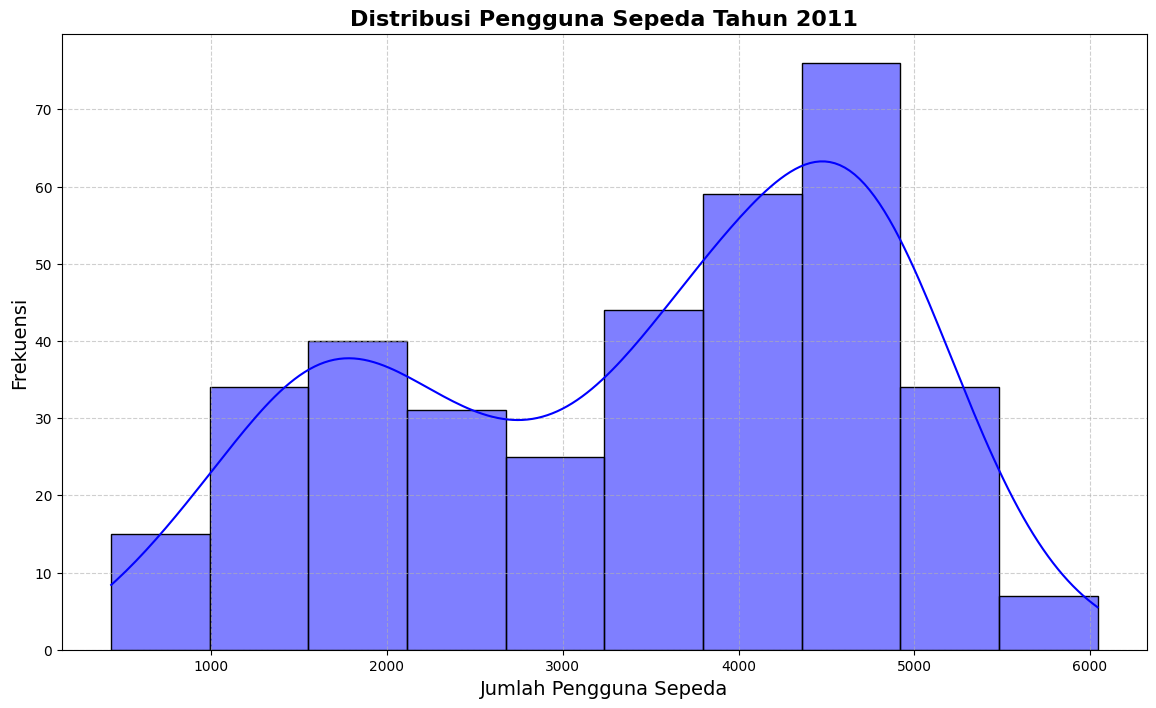

In [103]:
#Distribusi Data Dataset day.csv
day_df_filtered = day_df.iloc[:365]
plt.figure(figsize=(14, 8))
sns.histplot(day_df_filtered['cnt'], kde=True, color='blue')
plt.title("Distribusi Pengguna Sepeda Tahun 2011", fontsize=16, fontweight='bold')
plt.xlabel("Jumlah Pengguna Sepeda", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

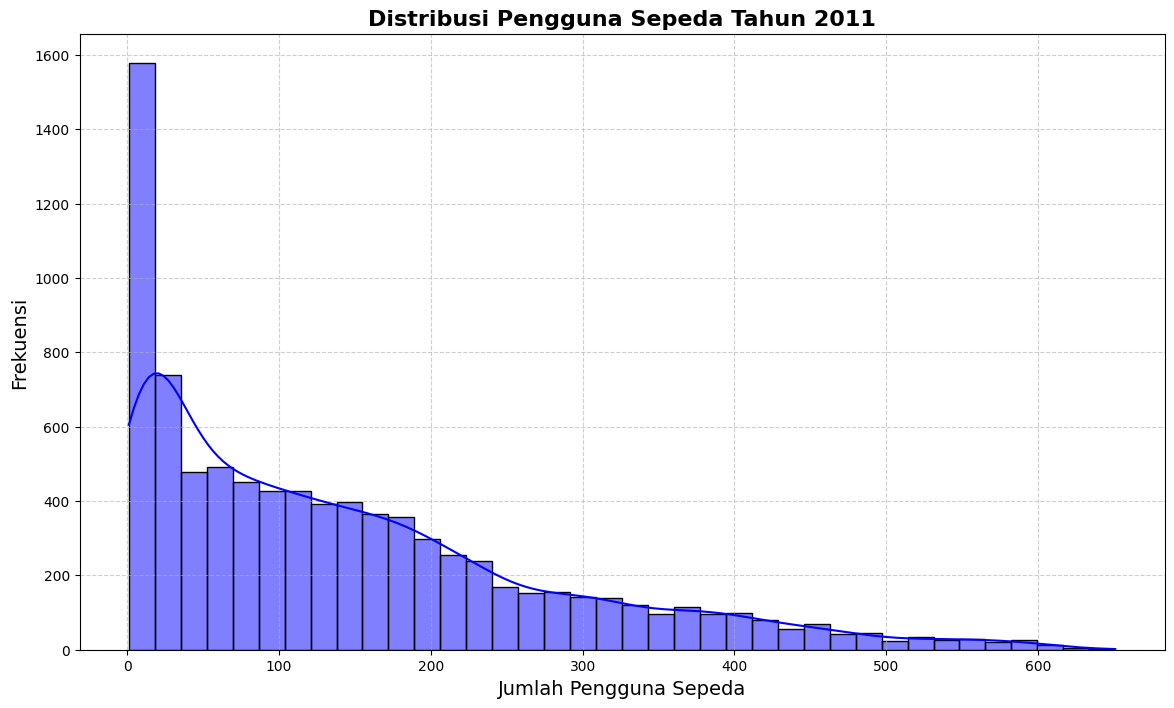

In [104]:
#Distribusi Data Dataset hour.csv
hr_df_filtered = hr_df.iloc[:8645]
plt.figure(figsize=(14, 8))
sns.histplot(hr_df_filtered['cnt'], kde=True, color='blue')
plt.title("Distribusi Pengguna Sepeda Tahun 2011", fontsize=16, fontweight='bold')
plt.xlabel("Jumlah Pengguna Sepeda", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Insight:**

Grafik tersebut menampilkan Distribusi Data pada dataset "day.csv" dan "hour.csv" dalam periode tahun 2011

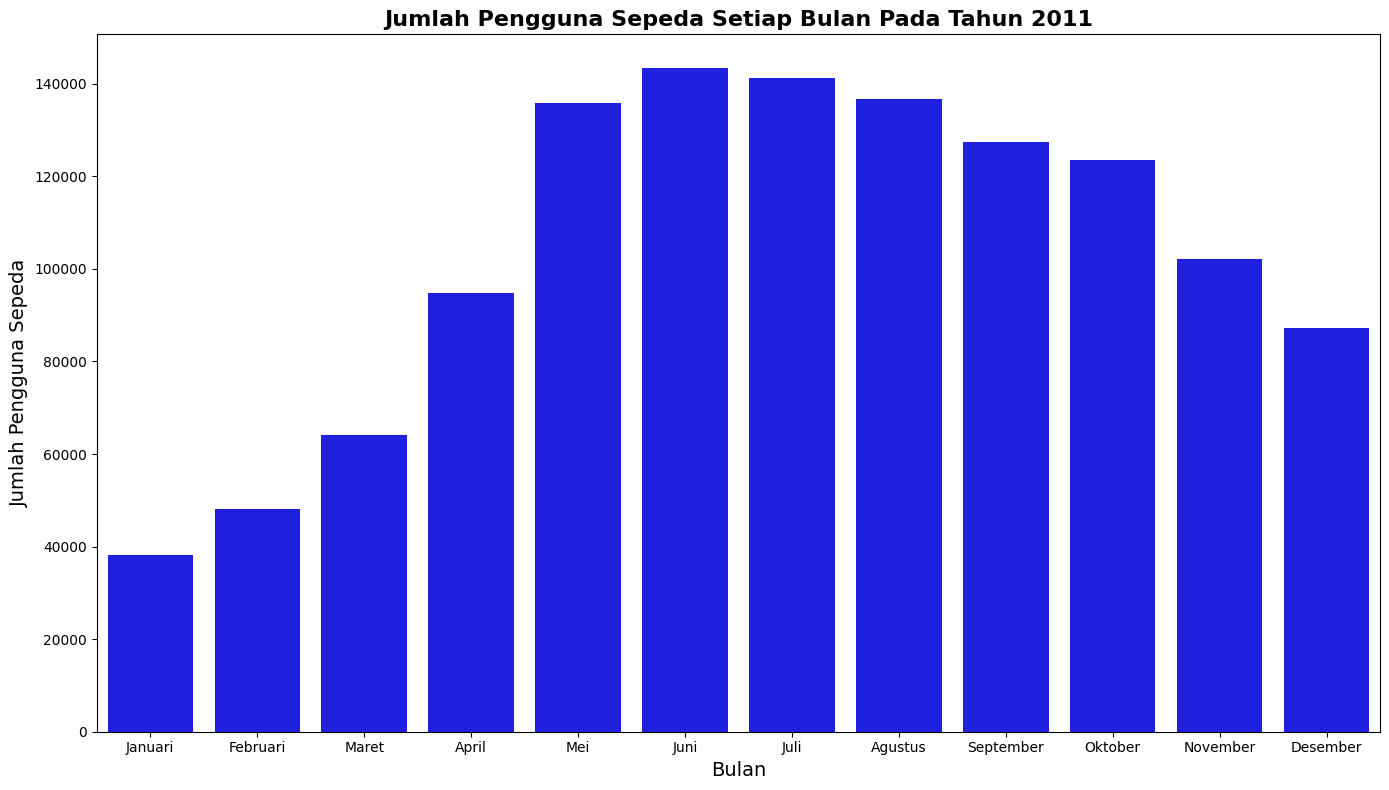

Jumlah pengguna sepeda per bulan:
- Bulan Januari 2011 : 38189 pengguna sepeda
- Bulan Februari 2011 : 48215 pengguna sepeda
- Bulan Maret 2011 : 64045 pengguna sepeda
- Bulan April 2011 : 94870 pengguna sepeda
- Bulan Mei 2011 : 135821 pengguna sepeda
- Bulan Juni 2011 : 143512 pengguna sepeda
- Bulan Juli 2011 : 141341 pengguna sepeda
- Bulan Agustus 2011 : 136691 pengguna sepeda
- Bulan September 2011 : 127418 pengguna sepeda
- Bulan Oktober 2011 : 123511 pengguna sepeda
- Bulan November 2011 : 102167 pengguna sepeda
- Bulan Desember 2011 : 87323 pengguna sepeda


In [105]:
# Membuat grafik jumlah pengguna sepeda per bulan
day_df_filtered = day_df.iloc[:365]
monthly_counts = day_df_filtered.groupby('mnth', observed=False)['cnt'].sum().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(x='mnth', y='cnt', data=monthly_counts,color='blue')
plt.title('Jumlah Pengguna Sepeda Setiap Bulan Pada Tahun 2011', fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Menampilkan jumlah pengguna sepeda per bulan
print("Jumlah pengguna sepeda per bulan:")
for index, row in monthly_counts.iterrows():
    print(f"- Bulan {row['mnth']} 2011 : {row['cnt']} pengguna sepeda")

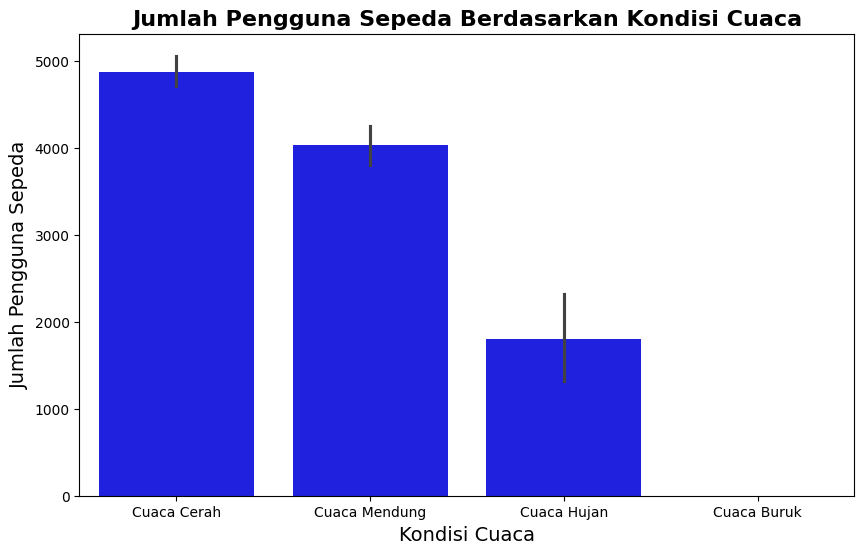

weathersit
Cuaca Cerah      463
Cuaca Mendung    247
Cuaca Hujan       21
Name: count, dtype: int64


In [106]:
# Membuat grafik jumlah pengguna sepeda berdasarkan kondisi cuaca
order = ['Cuaca Cerah', 'Cuaca Mendung', 'Cuaca Hujan', 'Cuaca Buruk']
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='cnt', data=day_df, order=order, color='blue')
plt.title('Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca', fontsize=16, fontweight='bold')
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=14)
plt.show()
print(day_df['weathersit'].value_counts())

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Berdasarkan dataset tersebut, bagaimana tren penggunaan sepeda sepanjang tahun 2011?

<ipython-input-107-f3ee118fdeb8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df_filtered.groupby("mnth").agg({


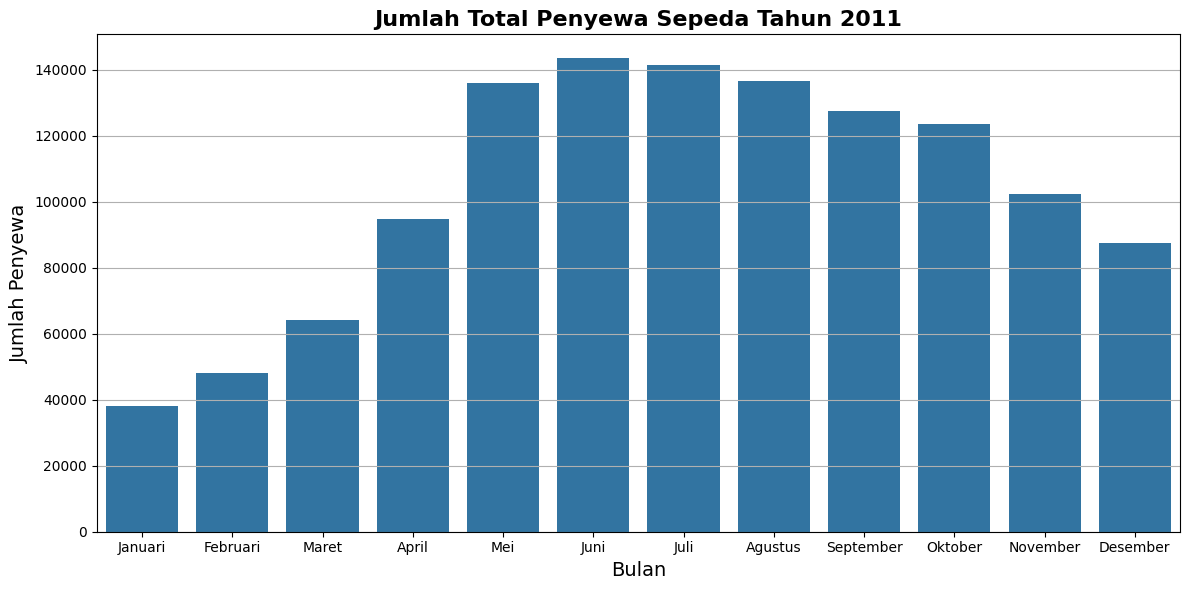

Jumlah pengguna tertinggi terjadi pada bulan Juni dengan total 143512 penyewa sepeda.


In [107]:
# Kelompokkan data berdasarkan bulan dan hitung jumlah pengguna
day_df_filtered = day_df.iloc[:365]
monthly_counts = day_df_filtered.groupby("mnth").agg({
    "cnt": "sum"
}).reset_index()

# Plot data sebagai grafik bar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
)
plt.title("Jumlah Total Penyewa Sepeda Tahun 2011", fontsize=16, fontweight='bold')
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Jumlah Penyewa", fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Temukan bulan dengan jumlah pengguna tertinggi
max_users = monthly_counts.loc[monthly_counts['cnt'].idxmax()]
print(f"Jumlah pengguna tertinggi terjadi pada bulan {max_users['mnth']} "
      f"dengan total {max_users['cnt']} penyewa sepeda.")

**insight:**



1.   Tren Kenaikan dan Penurunan

Grafik menunjukkan adanya tren kenaikan jumlah penyewa sepeda dari Januari hingga mencapai puncaknya di bulan Juni. Pada awal tahun, jumlah penyewa relatif rendah, namun mulai meningkat secara bertahap dari bulan Februari hingga April. Lonjakan signifikan terjadi pada bulan Mei, yang kemudian diikuti dengan puncak jumlah penyewaan di bulan Juni. Setelah mencapai puncaknya, jumlah penyewaan masih tetap tinggi tetapi mulai mengalami sedikit penurunan dari bulan Agustus hingga akhir tahun.


2.   Puncak Penyewaan

Bulan dengan jumlah penyewa tertinggi adalah Juni dan Juli, yang menandakan bahwa musim panas merupakan periode dengan permintaan tertinggi untuk penyewaan sepeda. Hal ini kemungkinan besar dipengaruhi oleh cuaca yang lebih hangat dan kondisi yang lebih mendukung untuk bersepeda. Kenaikan jumlah penyewaan sudah mulai terlihat sejak bulan April, dengan lonjakan besar pada bulan Mei. Setelah bulan Juli, jumlah penyewaan masih cukup tinggi tetapi cenderung menurun perlahan hingga akhir tahun.

### Pertanyaan 2:

Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda di tahun 2011?

<ipython-input-108-49ef052f68b0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals_by_season_weather_2011 = day_df_2011.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()


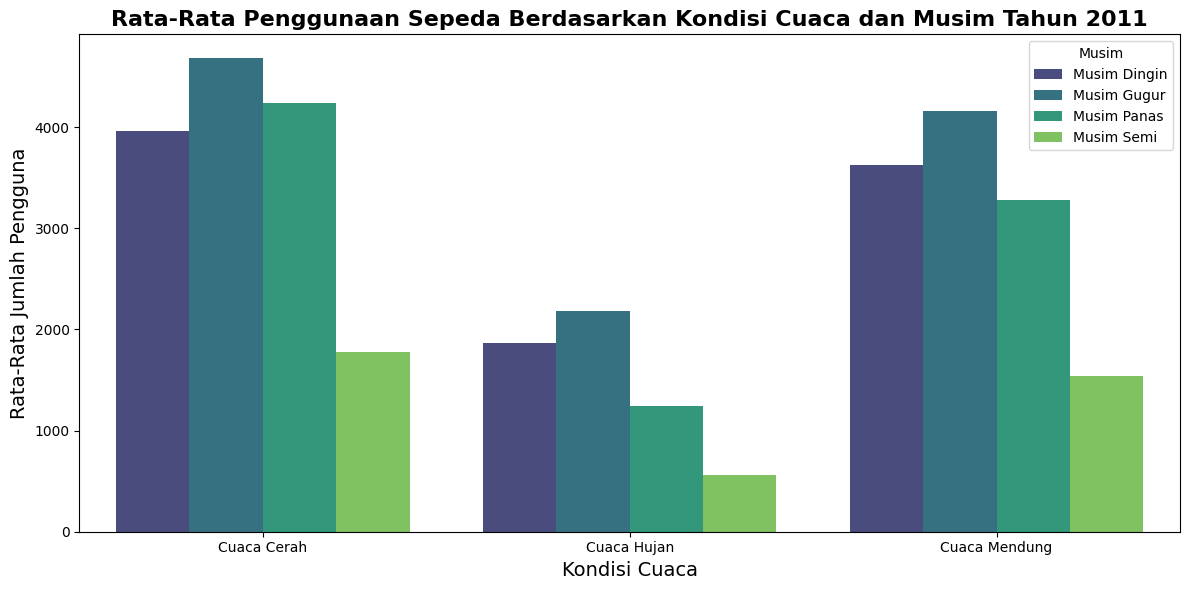

Kombinasi musim dan cuaca dengan rata-rata pengguna tertinggi pada tahun 2011 adalah:
Musim Gugur pada kondisi Cuaca Cerah dengan rata-rata 4684.09 pengguna.

Rata-rata Pengguna Sepeda Berdasarkan Musim dan Kondisi Cuaca (Tahun 2011):

Musim Dingin:
  - Cuaca Cerah: 3962.67 pengguna rata-rata
  - Cuaca Hujan: 1869.38 pengguna rata-rata
  - Cuaca Mendung: 3624.93 pengguna rata-rata

Musim Gugur:
  - Cuaca Cerah: 4684.09 pengguna rata-rata
  - Cuaca Hujan: 2182.67 pengguna rata-rata
  - Cuaca Mendung: 4158.08 pengguna rata-rata

Musim Panas:
  - Cuaca Cerah: 4236.98 pengguna rata-rata
  - Cuaca Hujan: 1240.00 pengguna rata-rata
  - Cuaca Mendung: 3276.66 pengguna rata-rata

Musim Semi:
  - Cuaca Cerah: 1777.41 pengguna rata-rata
  - Cuaca Hujan: 564.50 pengguna rata-rata
  - Cuaca Mendung: 1541.75 pengguna rata-rata


In [108]:
# Mengelompokkan data berdasarkan musim dan kondisi cuaca pada tahun 2011
day_df_2011 = day_df[day_df['yr'] == '2011']

# Menghitung rata-rata pengguna sepeda berdasarkan musim dan kondisi cuaca
avg_rentals_by_season_weather_2011 = day_df_2011.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()

unique_seasons = avg_rentals_by_season_weather_2011['season'].unique()
unique_weathers = avg_rentals_by_season_weather_2011['weathersit'].unique()

# Membuat visualisasi data
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_rentals_by_season_weather_2011,
    x='weathersit',
    y='cnt',
    hue='season',
    palette='viridis',
)

plt.title('Rata-Rata Penggunaan Sepeda Berdasarkan Kondisi Cuaca dan Musim Tahun 2011', fontsize=16, fontweight='bold')
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Rata-Rata Jumlah Pengguna', fontsize=14)
plt.legend(title='Musim', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Menampilkan musim dan kondisi cuaca dengan rata-rata pengguna tertinggi
highest_usage_2011 = avg_rentals_by_season_weather_2011.loc[avg_rentals_by_season_weather_2011['cnt'].idxmax()]
print(f"Kombinasi musim dan cuaca dengan rata-rata pengguna tertinggi pada tahun 2011 adalah:\n"
      f"{highest_usage_2011['season']} pada kondisi {highest_usage_2011['weathersit']} "
      f"dengan rata-rata {highest_usage_2011['cnt']:.2f} pengguna.")

print("\nRata-rata Pengguna Sepeda Berdasarkan Musim dan Kondisi Cuaca (Tahun 2011):")
for season in unique_seasons:
    print(f"\n{season}:")
    for weather in unique_weathers:
        filtered_data = avg_rentals_by_season_weather_2011[
            (avg_rentals_by_season_weather_2011['season'] == season) &
            (avg_rentals_by_season_weather_2011['weathersit'] == weather)
        ]['cnt']

        if not filtered_data.empty:
            print(f"  - {weather}: {filtered_data.values[0]:.2f} pengguna rata-rata")
        else:
            print(f"  - {weather}: Data tidak tersedia")

**Insight:**


1.   Perbandingan Jumlah Penyewa Sepeda Berdasarkan Kondisi Cuaca

Dari grafik, terlihat bahwa jumlah rata-rata penyewa sepeda lebih tinggi saat Cuaca Cerah dibandingkan dengan kondisi cuaca lainnya. Hal ini menunjukkan bahwa pengguna lebih memilih menyewa sepeda ketika cuaca bersahabat dan tidak ada hujan atau gangguan cuaca lainnya. Sebaliknya, Cuaca Hujan memiliki jumlah penyewa yang paling sedikit, yang masuk akal karena hujan bisa menjadi penghalang bagi pengguna sepeda.

2.   Pengaruh Musim terhadap Jumlah Penyewa Sepeda

Dalam setiap kondisi cuaca, musim Gugur dan Panas memiliki jumlah penyewa tertinggi dibandingkan dengan musim Dingin dan Semi. Ini mengindikasikan bahwa cuaca yang lebih hangat atau sejuk di musim Gugur dan Panas lebih menarik bagi pengguna sepeda. Sementara itu, musim Semi memiliki jumlah penyewa terendah di hampir semua kondisi cuaca, yang bisa jadi disebabkan oleh ketidakstabilan cuaca seperti hujan atau suhu yang masih dingin.

3.   Pola Penurunan Jumlah Penyewa Berdasarkan Cuaca dan Musim

Pada Cuaca Cerah, terlihat bahwa musim Gugur memiliki jumlah pengguna tertinggi, diikuti oleh musim Panas, Dingin, dan terakhir Semi. Pada Cuaca Mendung, pola yang hampir sama terjadi, meskipun jumlah pengguna secara keseluruhan lebih sedikit dibandingkan dengan Cuaca Cerah. Sementara itu, pada Cuaca Hujan, terjadi penurunan drastis jumlah pengguna di semua musim, dengan musim Gugur tetap memiliki angka tertinggi, tetapi jauh lebih rendah dibandingkan dengan saat cuaca cerah atau mendung.

### Pertanyaan 3:

Apakah ada perbedaan pola penggunaan sepeda pada hari kerja dan akhir pekan di 2011? Jika iya bagaimana polanya?

<ipython-input-109-354ee1f9866b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


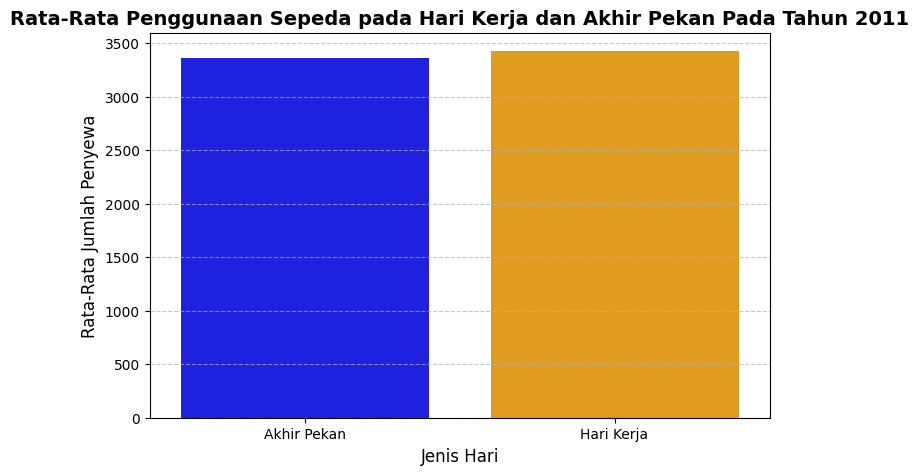

Akhir Pekan: 3363.82 pengguna rata-rata per hari.
Hari Kerja: 3425.06 pengguna rata-rata per hari.


In [109]:
# Mengelompokkan data berdasarkan hari kerja dan akhir pekan
usage_by_workingday = day_2011_df.groupby("workingday")["cnt"].mean().reset_index()
day_2011_df = day_df[day_df['yr'] == '2011']

# Mapping kategori agar lebih mudah dipahami
usage_by_workingday["workingday"] = usage_by_workingday["workingday"].map({
    0: "Akhir Pekan",
    1: "Hari Kerja"
})

# Membuat plot
plt.figure(figsize=(8, 5))
colors = ["Blue", "Orange"]
sns.barplot(
    data=usage_by_workingday,
    x="workingday",
    y="cnt",
    palette=colors
)

# Menambahkan judul dan label
plt.title("Rata-Rata Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan Pada Tahun 2011", fontsize=14, fontweight="bold")
plt.xlabel("Jenis Hari", fontsize=12)
plt.ylabel("Rata-Rata Jumlah Penyewa", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan grafik
plt.show()

# Menampilkan hasil dalam bentuk teks
for index, row in usage_by_workingday.iterrows():
    print(f"{row['workingday']}: {row['cnt']:.2f} pengguna rata-rata per hari.")

**Insight:**


1.   Pola Penggunaan Sepeda pada Hari Kerja

Pada hari kerja, jumlah rata-rata pengguna sepeda sedikit lebih tinggi dibandingkan akhir pekan dengan nilai 3363.82 pengguna rata-rata per hari. Hal ini mengindikasikan bahwa sepeda banyak digunakan sebagai alat transportasi ke tempat kerja atau sekolah. Faktor ini bisa disebabkan oleh kebijakan ramah lingkungan, kepadatan lalu lintas, atau kemudahan akses menggunakan sepeda dibandingkan kendaraan bermotor di daerah perkotaan.

2.   Pola Penggunaan Sepeda pada Akhir Pekan

Meskipun sedikit lebih rendah, rata-rata penggunaan sepeda pada akhir pekan dengan nilai 3363.82 pengguna rata-rata per hari. Ini menunjukkan bahwa sepeda juga populer sebagai sarana rekreasi atau olahraga. Banyak orang kemungkinan menggunakan sepeda untuk aktivitas santai, bersepeda di taman, atau sekadar menikmati waktu luang dengan keluarga dan teman-teman.

## Analisis Lanjutan (Opsional)

In [110]:
#Menentukan nilai maksimal tanggal untuk perhitungan Recency
latest_date = day_df["dteday"].max()

#Perhitungan RFM
rfm_df = day_df.groupby("dteday").agg(
    Recency=("dteday", lambda x: (latest_date - x.max()).days),
    Frequency=("dteday", "count"),
    Monetary=("cnt", "sum")
).reset_index()

rfm_df.head()

,dteday,Recency,Frequency,Monetary
0,2011-01-01,730,1,985
1,2011-01-02,729,1,801
2,2011-01-03,728,1,1349
3,2011-01-04,727,1,1562
4,2011-01-05,726,1,1600


Hasil analisis RFM menunjukkan bahwa:



*   Recency (R)

Recency (R) dihitung berdasarkan jumlah hari sejak terakhir kali sepeda disewa, dengan nilai tertinggi 730 hari.

*   Frequency (F)

Frequency (F) dihitung sebagai jumlah transaksi per hari, yang bernilai 1 karena data ini berbasis agregasi harian.

*   Monetary (M)

Monetary (M) dihitung sebagai total jumlah sepeda yang disewa dalam satu hari.

## Conclusion

**CONCLUTION**
- Conclution pertanyaan 1

Berdasarkan analisis data, tren penggunaan sepeda sepanjang tahun 2011 menunjukkan pola musiman yang jelas. Jumlah pengguna sepeda cenderung lebih tinggi pada bulan-bulan musim panas (Juni, Juli, Agustus) dibandingkan musim dingin. Puncak jumlah pengguna terjadi pada bulan-bulan dengan cuaca yang lebih hangat, menunjukkan bahwa kondisi iklim sangat mempengaruhi pola penggunaan sepeda.

- Conclution pertanyaan 2

Pengaruh cuaca terhadap jumlah pengguna sepeda sangat signifikan. Cuaca cerah memiliki jumlah penyewa sepeda tertinggi dibandingkan dengan kondisi cuaca lainnya. Sebaliknya, pada hari-hari dengan kondisi cuaca hujan atau buruk, jumlah pengguna sepeda menurun drastis. Ini menunjukkan bahwa kebanyakan pengguna lebih memilih menggunakan sepeda saat cuaca mendukung dan cenderung menghindarinya saat kondisi kurang bersahabat.

- Conclution pertanyaan 3

Ya, terdapat perbedaan pola yang cukup mencolok dalam penggunaan sepeda antara hari kerja dan akhir pekan. Pada hari kerja, jumlah pengguna sepeda cenderung lebih tinggi di pagi dan sore hari, menunjukkan pola penggunaan sepeda sebagai moda transportasi untuk bekerja atau bersekolah. Sementara itu, pada akhir pekan, pola penggunaan lebih merata sepanjang hari, yang menunjukkan bahwa sepeda lebih banyak digunakan untuk rekreasi atau aktivitas santai.



**REKOMENDASI PENINGKATAN PELAYANAN PENYEWAAN SEPEDA**

langkah-langkah berikut dapat diterapkan untuk meningkatkan pelayanan penyewaan sepeda berdasarkan tren penggunaan yang telah dianalisis:


1.   Penyesuaian Ketersediaan Sepeda Berdasarkan Waktu dan Musim



*   Tambahkan lebih banyak sepeda pada hari kerja karena tingkat penggunaan cenderung lebih tinggi.

*   Tingkatkan jumlah sepeda selama musim panas dan gugur karena penggunaan meningkat dibandingkan musim dingin dan semi.

*   Kurangi jumlah sepeda yang tersedia pada saat cuaca buruk seperti hujan untuk menghindari biaya pemeliharaan yang tidak perlu.

2.   Optimalisasi Lokasi Stasiun Penyewaan

*   Letakkan lebih banyak stasiun penyewaan di area perkantoran dan kampus untuk mendukung tingginya jumlah penyewa pada hari kerja.

*   Tambahkan stasiun penyewaan di tempat wisata atau taman kota untuk mengakomodasi lonjakan penyewa di akhir pekan.

3.   Peningkatan Layanan dan Infrastruktur

*    Menyediakan shelter atau tempat parkir tertutup di beberapa lokasi strategis untuk melindungi sepeda dari cuaca buruk.

4.   Penyesuaian Harga dan Promosi

*   Menawarkan tarif sewa yang lebih rendah selama musim dingin untuk menarik lebih banyak pengguna.

*   Memberikan diskon atau paket langganan bulanan bagi pekerja dan mahasiswa yang menggunakan sepeda secara rutin.

In [112]:
# Gabungkan kedua dataset berdasarkan kolom 'dteday'
merged_df = pd.merge(hr_df, day_df, on="dteday", suffixes=("_hour", "_day"))

# Simpan dataset yang telah digabung ke dalam file CSV baru
merged_df.to_csv("all_data.csv", index=False)